In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt   # data visualization
import seaborn as sns             # statistical data visualization
import os

In [2]:
df = pd.read_csv('./AirPassengers.csv')
df.columns = ['Date','Number of Passengers']
df.index = pd.to_datetime(df.Date)

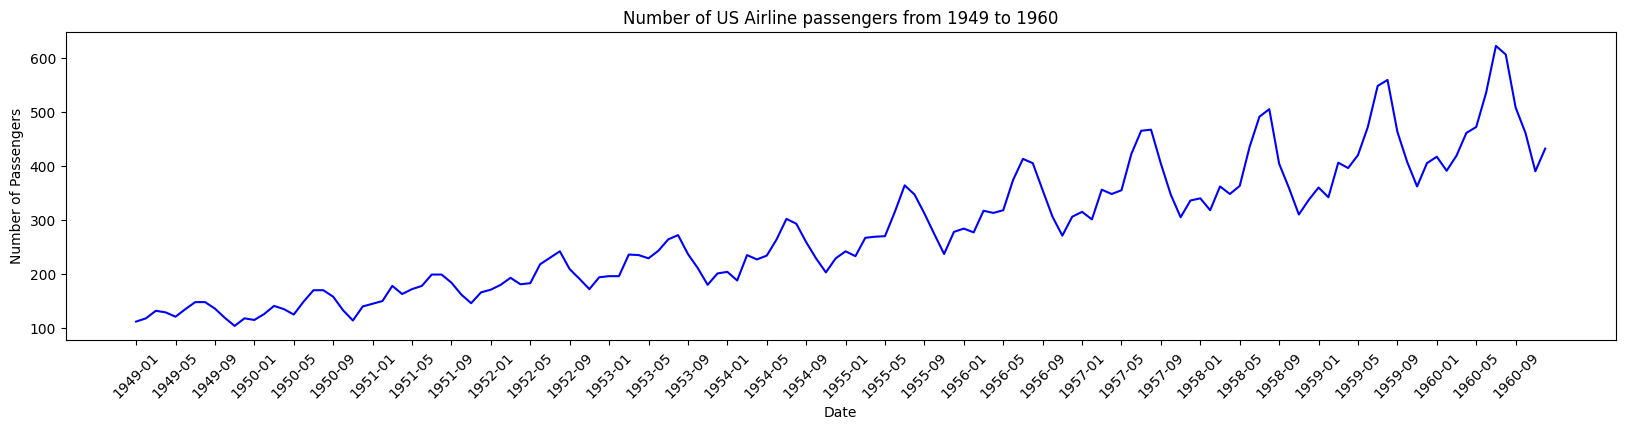

In [3]:
plt.figure(figsize=(20,4))
plt.plot(df['Date'],
         df['Number of Passengers'],
         color='blue')
plt.xticks(rotation=45)
ax = plt.gca()
ax.set(title="Number of US Airline passengers from 1949 to 1960",
              xlabel='Date',
              ylabel='Number of Passengers')
ax.set_xticks(ax.get_xticks()[::4])
plt.show()

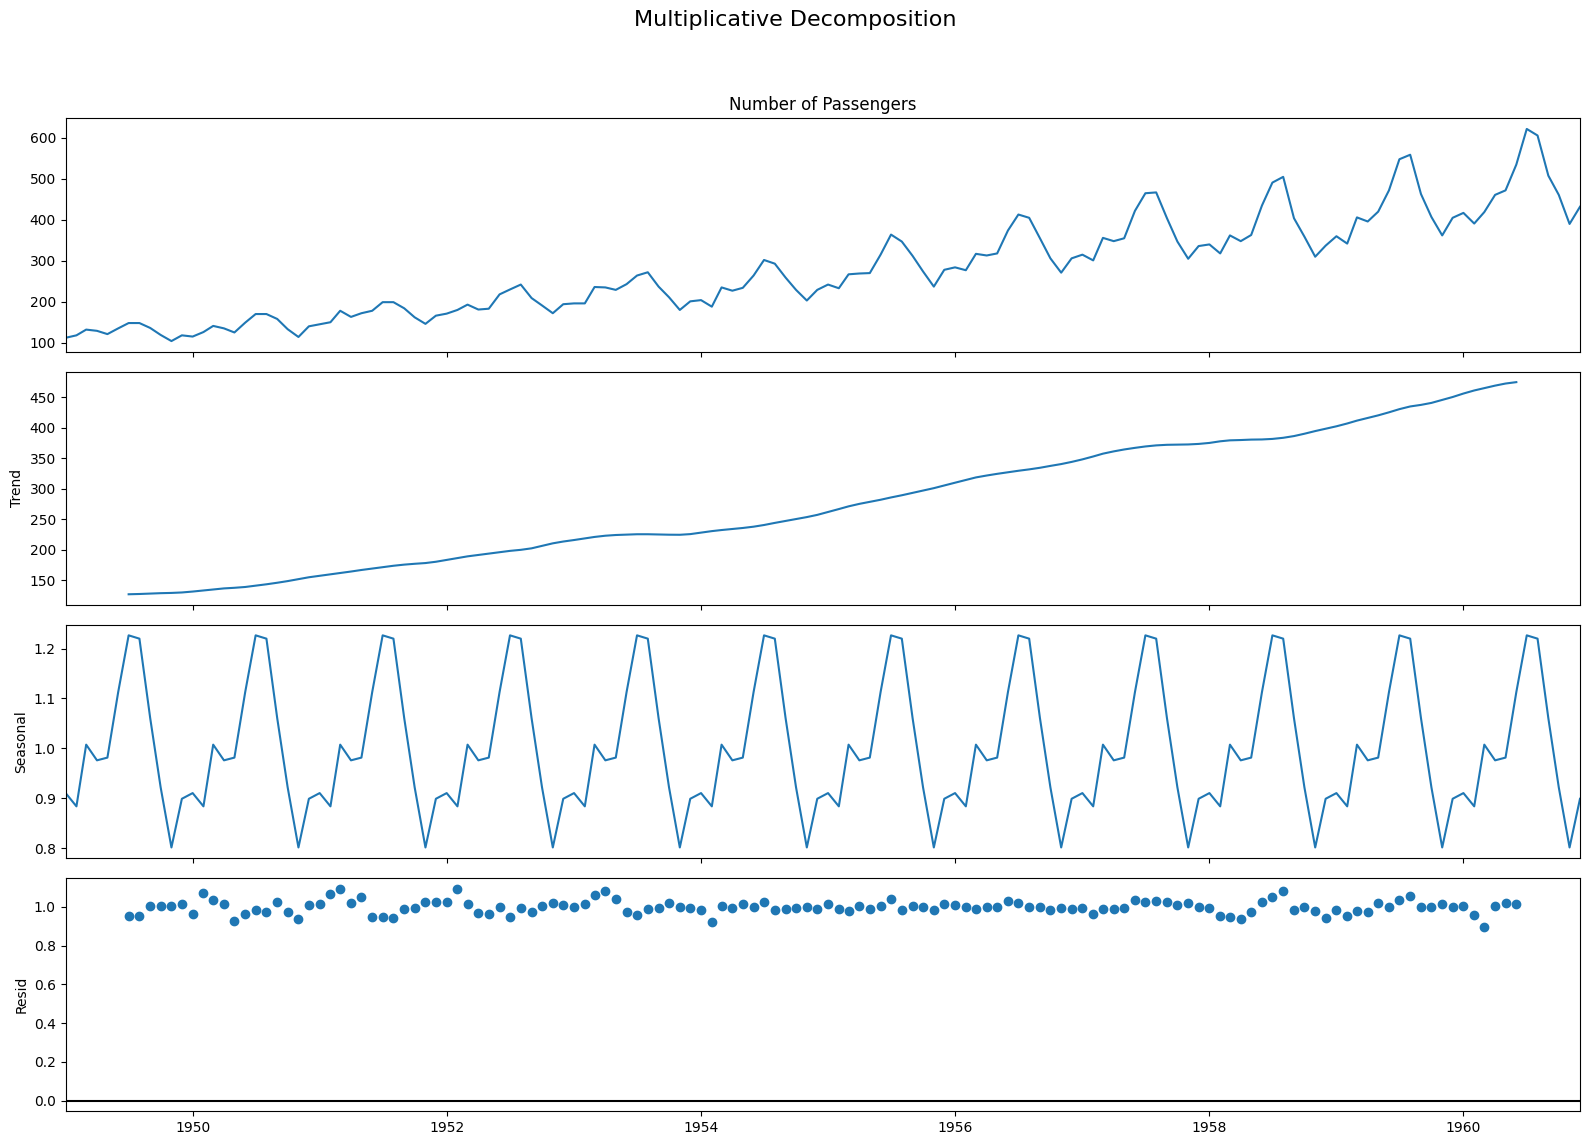

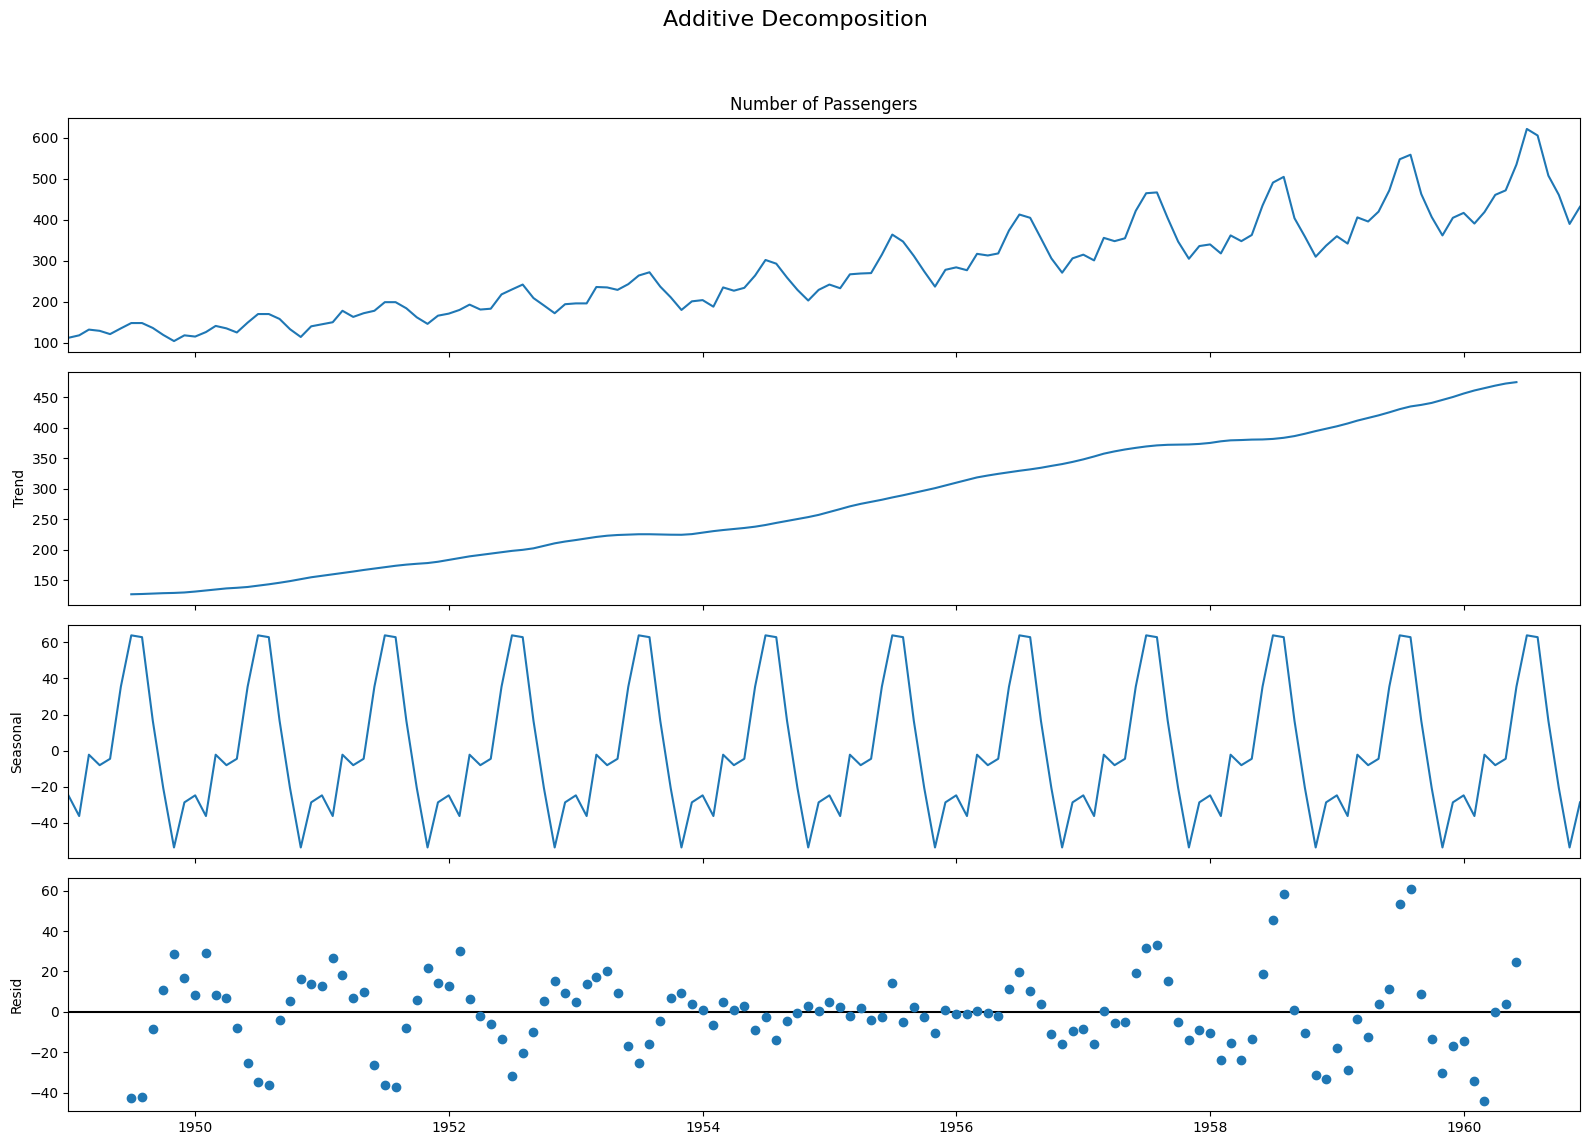

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Additive Decomposition
additive_decomposition = seasonal_decompose(df['Number of Passengers'], model='additive')

# Multiplicative Decomposition
multiplicative_decomposition = seasonal_decompose(df['Number of Passengers'], model='multiplicative')



# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

The main components of time series decomposition are:

Trend: The trend component represents the long-term direction or tendency of the data. It captures the underlying growth or decline in the time series.

Seasonality: Seasonality is typically described as a pattern that repeats over a fixed time horizon, such as daily, weekly, or annually.

Cycles: Cycles are patterns in the data that are not strictly regular like seasonality but occur over a more extended period.

Key difference between Seasonality and Cycle: Seasonality is always of a fixed and known period, but cycle is not and in general cycle has longer length and bigger variation compare to seasonality.

Basic decomposition models:

Additive model:
Value = Trend + Seasonality + Error

Multiplicative model:
Value = Trend x Seasonality x Error